In [21]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

In [22]:
# Create and fit the Hybrid RNN + CNN model
hybrid_model = Sequential()
hybrid_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, 1)))
hybrid_model.add(MaxPooling1D(pool_size=2))
hybrid_model.add(Flatten())
hybrid_model.add(Dense(50, activation='relu'))
hybrid_model.add(Dense(1))
hybrid_model.compile(loss='mean_squared_error', optimizer='adam')
hybrid_model.fit(X, y, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


140/140 - 1s - 9ms/step - loss: 0.0187
Epoch 2/100
140/140 - 0s - 2ms/step - loss: 0.0096
Epoch 3/100
140/140 - 0s - 2ms/step - loss: 0.0089
Epoch 4/100
140/140 - 0s - 2ms/step - loss: 0.0084
Epoch 5/100
140/140 - 0s - 1ms/step - loss: 0.0077
Epoch 6/100
140/140 - 0s - 2ms/step - loss: 0.0078
Epoch 7/100
140/140 - 0s - 2ms/step - loss: 0.0068
Epoch 8/100
140/140 - 0s - 2ms/step - loss: 0.0069
Epoch 9/100
140/140 - 0s - 1ms/step - loss: 0.0067
Epoch 10/100
140/140 - 0s - 2ms/step - loss: 0.0066
Epoch 11/100
140/140 - 0s - 3ms/step - loss: 0.0067
Epoch 12/100
140/140 - 0s - 2ms/step - loss: 0.0060
Epoch 13/100
140/140 - 1s - 5ms/step - loss: 0.0063
Epoch 14/100
140/140 - 0s - 2ms/step - loss: 0.0058
Epoch 15/100
140/140 - 0s - 2ms/step - loss: 0.0061
Epoch 16/100
140/140 - 0s - 2ms/step - loss: 0.0055
Epoch 17/100
140/140 - 1s - 4ms/step - loss: 0.0049
Epoch 18/100
140/140 - 0s - 1ms/step - loss: 0.0052
Epoch 19/100
140/140 - 0s - 1ms/step - loss: 0.0053
Epoch 20/100
140/140 - 0s - 1ms/s

In [23]:
# Make predictions
hybrid_train_predict = hybrid_model.predict(X)
hybrid_train_predict = scaler.inverse_transform(hybrid_train_predict)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


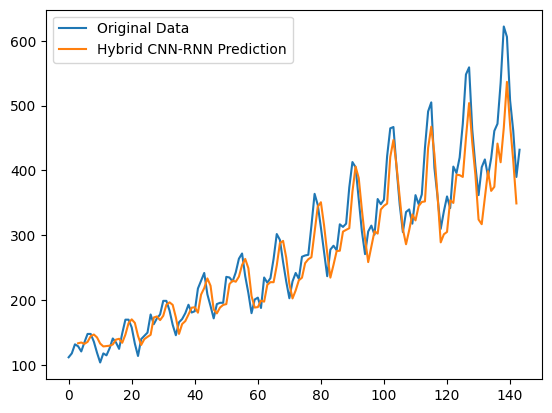

In [24]:
#Plot results
plt.plot(scaler.inverse_transform(data_scaled), label='Original Data')
plt.plot(np.arange(look_back, len(hybrid_train_predict) + look_back), hybrid_train_predict, label='Hybrid CNN-RNN Prediction')
plt.legend()
plt.show()

In [25]:
# Calculate performance
hybrid_mse = mean_squared_error(y_true[0], hybrid_train_predict.flatten())
print(f"Hybrid CNN-RNN Mean Squared Error: {hybrid_mse}")

Hybrid CNN-RNN Mean Squared Error: 1347.6856337990787
